Loading the Ames Housing dataset...
Dataset loaded successfully.
------------------------------
Selected feature for encoding: 'Neighborhood'
Original unique categories and their counts:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64
------------------------------
Frequency encoding applied.
New column 'Neighborhood_freq_encoded' created.
------------------------------
DataFrame head with the new encoded column:
  Neighborhood  Neighborhood_freq_encoded
0      CollgCr                        150
1      Veenker                         11
2      CollgCr                        150
3      Crawfor                         51
4      

C:\Users\basde\AppData\Local\Temp\ipykernel_17464\772503434.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], y=df[feature_to_encode], order=df[feature_to_encode].value_counts().index, palette='viridis')


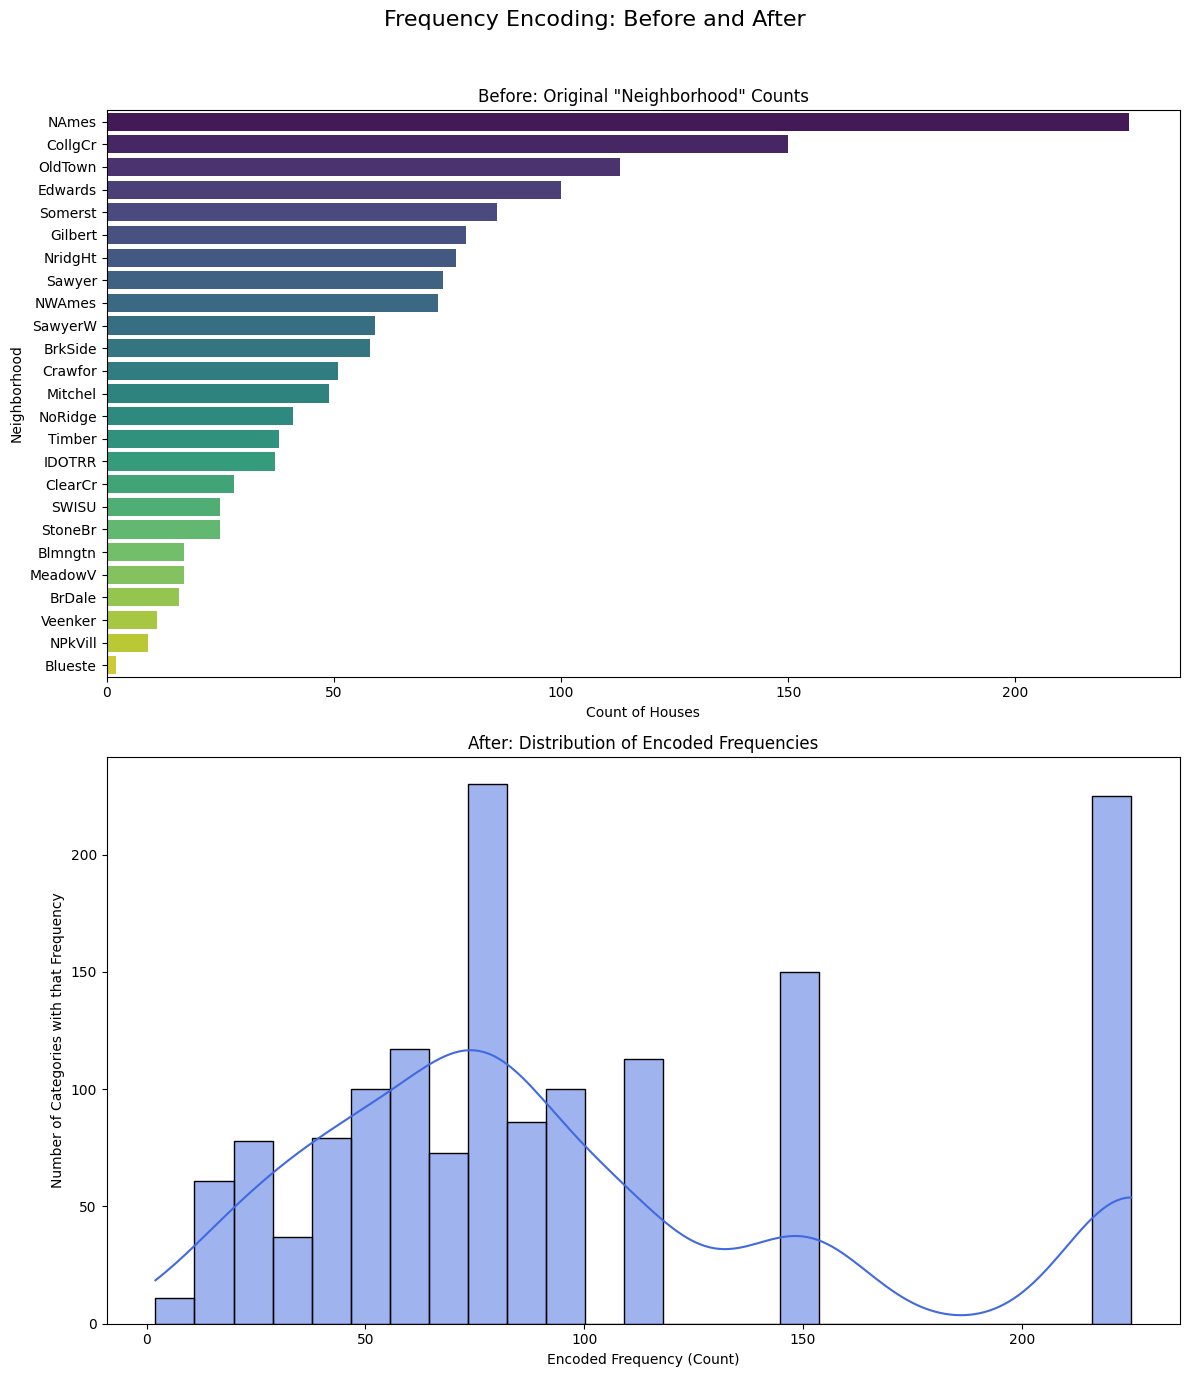

Visualization complete.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# ---
# Frequency (Count) Encoding
# ---
#
# When to use it:
# - It's a simple and fast way to encode categorical features.
# - It can be effective for tree-based models (like Random Forest or Gradient Boosting)
#   because it captures the importance of a category based on its frequency. A more frequent
#   category might have a different relationship with the target variable.
# - It works well for features with high cardinality (many unique categories).
#
# Requirements & Considerations:
# - The data must be categorical.
# - It assumes that the frequency of a category is a meaningful predictor.
# - It can assign the same numerical value to two different categories if they have the
#   same frequency, which might lead to a loss of information.
# - One must be careful with how frequencies are calculated on the training set and
#   applied to the test set. A category present in the test set but not the training
#   set would get a missing value, which must be handled (e.g., by imputing with 1).

# 1. FIND AND LOAD A RELEVANT DATASET FROM SCIKIT-LEARN
# We'll use the Ames Housing dataset, which contains many categorical features.
# We load it directly from OpenML using scikit-learn's fetcher.
print("Loading the Ames Housing dataset...")
housing = fetch_openml(name="house_prices", as_frame=True)
df = housing.frame
print("Dataset loaded successfully.")
print("-" * 30)


# 2. SELECT A FEATURE TO WORK WITH
# The 'Neighborhood' feature is a good candidate as it's a nominal categorical
# variable with several unique values.
feature_to_encode = 'Neighborhood'
print(f"Selected feature for encoding: '{feature_to_encode}'")
print("Original unique categories and their counts:")
print(df[feature_to_encode].value_counts())
print("-" * 30)


# 3. APPLY THE FREQUENCY (COUNT) ENCODING
# We calculate the frequency of each category in the 'Neighborhood' column.
frequency_map = df[feature_to_encode].value_counts().to_dict()

# We then create a new column in the DataFrame to store the encoded values.
# The .map() function replaces each category name with its calculated frequency.
new_column_name = f'{feature_to_encode}_freq_encoded'
df[new_column_name] = df[feature_to_encode].map(frequency_map)

print("Frequency encoding applied.")
print(f"New column '{new_column_name}' created.")
print("-" * 30)


# 4. SHOW THE RESULT OF APPLYING THE TECHNIQUE
# We'll print the head of the DataFrame to show the original and new encoded columns side-by-side.
print("DataFrame head with the new encoded column:")
print(df[[feature_to_encode, new_column_name]].head(10))
print("-" * 30)

# Create a "before-and-after" visualization to show the effect of the transformation.
print("Generating before-and-after visualization...")

fig, axes = plt.subplots(2, 1, figsize=(12, 14))
fig.suptitle('Frequency Encoding: Before and After', fontsize=16)
plt.subplots_adjust(hspace=0.4)

# Before: A count plot of the original categorical feature
sns.countplot(ax=axes[0], y=df[feature_to_encode], order=df[feature_to_encode].value_counts().index, palette='viridis')
axes[0].set_title('Before: Original "Neighborhood" Counts')
axes[0].set_xlabel('Count of Houses')
axes[0].set_ylabel('Neighborhood')

# After: A histogram of the new frequency-encoded feature
# This shows the distribution of the frequencies themselves.
sns.histplot(ax=axes[1], data=df, x=new_column_name, bins=len(frequency_map), kde=True, color='royalblue')
axes[1].set_title('After: Distribution of Encoded Frequencies')
axes[1].set_xlabel('Encoded Frequency (Count)')
axes[1].set_ylabel('Number of Categories with that Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
print("Visualization complete.")
